# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data

In [3]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Check the shape of the dataset
df.shape 

(1898, 9)

- There are 1898 rows and 9 columns in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [5]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

- In the data, there are 4 columns with int64 datatype, 4 columns with object datatype, and 1 column with float datatype.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [6]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

- There are no missing values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Get the summary statistics of the numerical data
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


- From the statistical summary of the data above,the following relevant information for Food Preparation Time are extracted 
below:
    
    - The Minimum preparation time is 20.0 minutes
    - The Average preparation time is 27.37197 minutes, i.e The Mean  
    - The Maximum preparation time is 35.0 minutes



Other Information

- For Food Delivery Time:
    - Minimum delivery time: 15.0 minutes
    - Average delivery time (mean): 24.161749 minutes
    - Maximum delivery time: 33.0 minutes
    

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df['rating'].value_counts() ## Complete the code

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

- The total number of orders that are not rated is 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [9]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [10]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [11]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [12]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

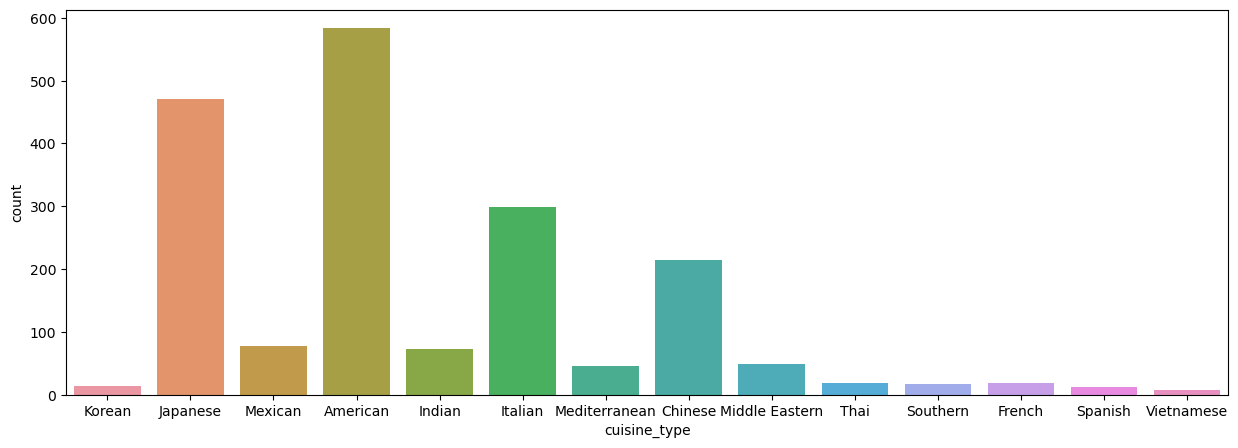

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.show()

From the countplot, it can be observed that the cuisine type with the highest number of orders is American, followed by Japanese, Italian, and Chinese. The Middle Eastern cuisine also has a relatively high number of orders. On the other hand, the cuisine types with fewer orders include Vietnamese, followed by Spanish, French, Southern, and Thai, in that order.

#### Cost of the order

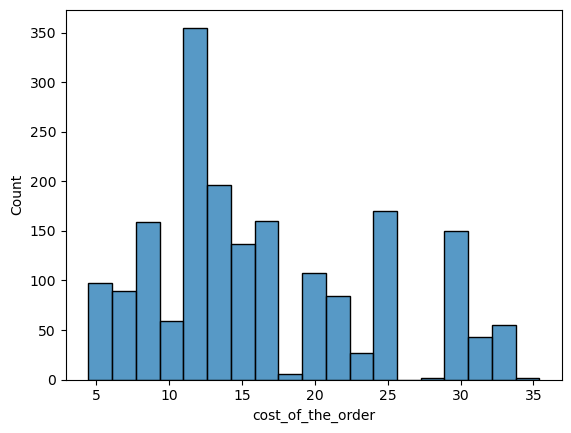

In [14]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()

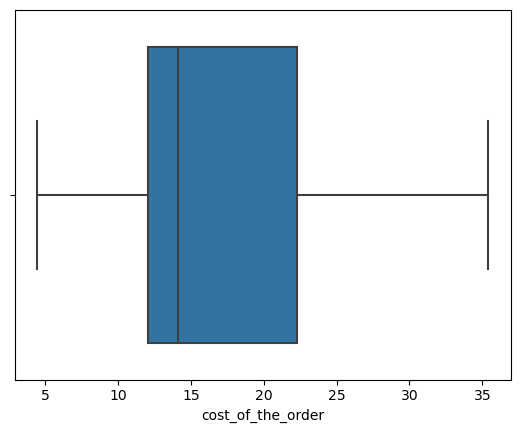

In [15]:
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [16]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

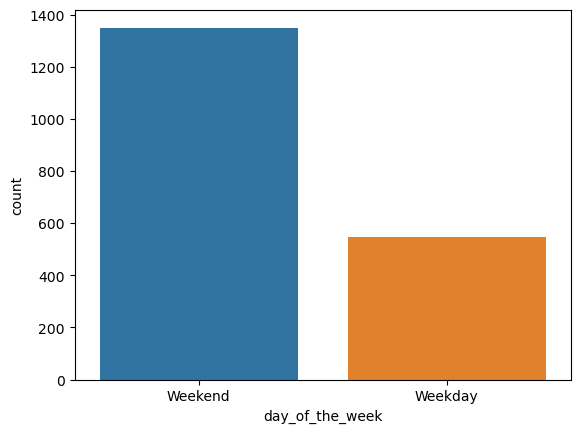

In [17]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [18]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

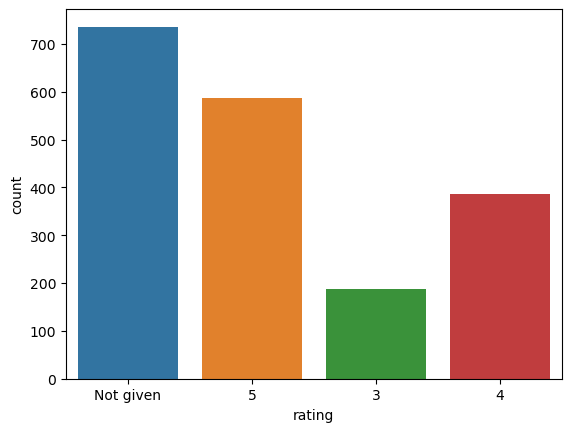

In [19]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column
plt.show()

#### Food Preparation time

In [20]:
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26],
      dtype=int64)

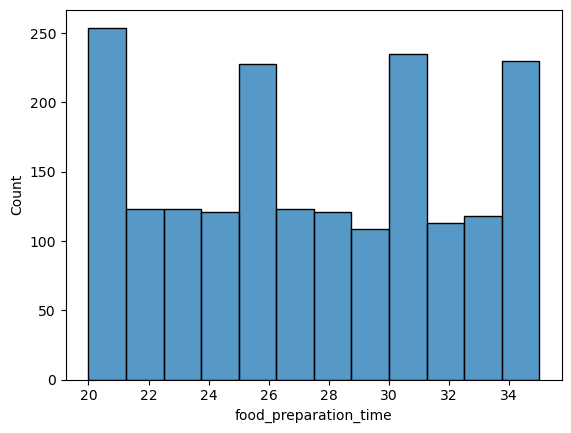

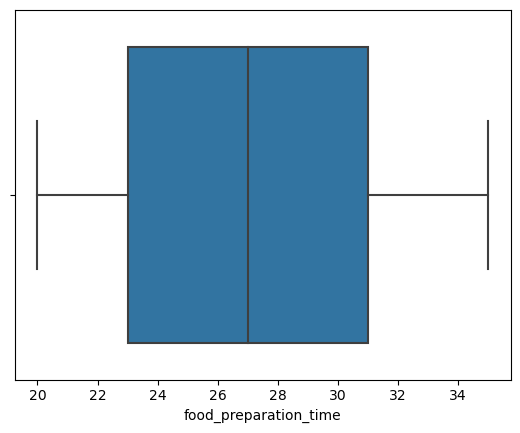

In [21]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the Food Preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the Food Preparation time
plt.show()

#### Delivery time

In [22]:
df['delivery_time'].unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33], dtype=int64)

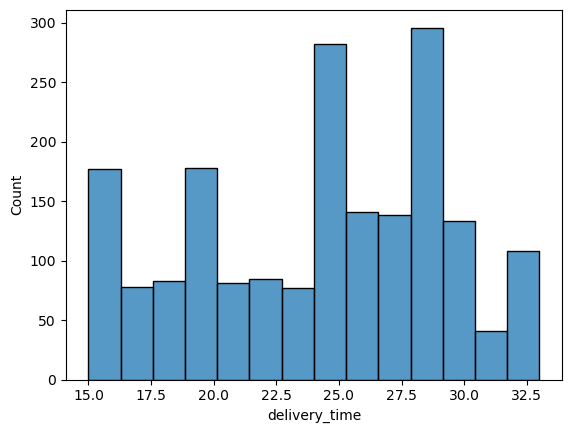

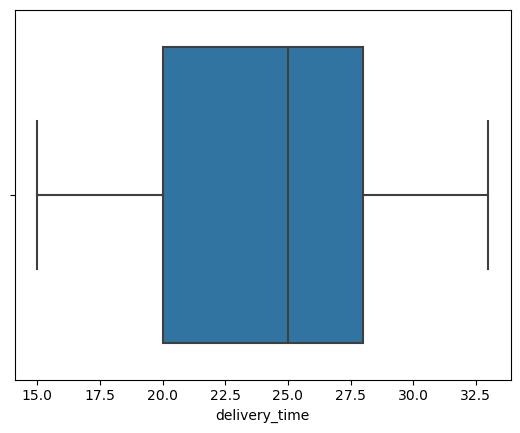

In [23]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [24]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [25]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().max() ## Complete the code to check unique values for the cuisine type on weekend

415

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [26]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

In [27]:
# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [28]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean() ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

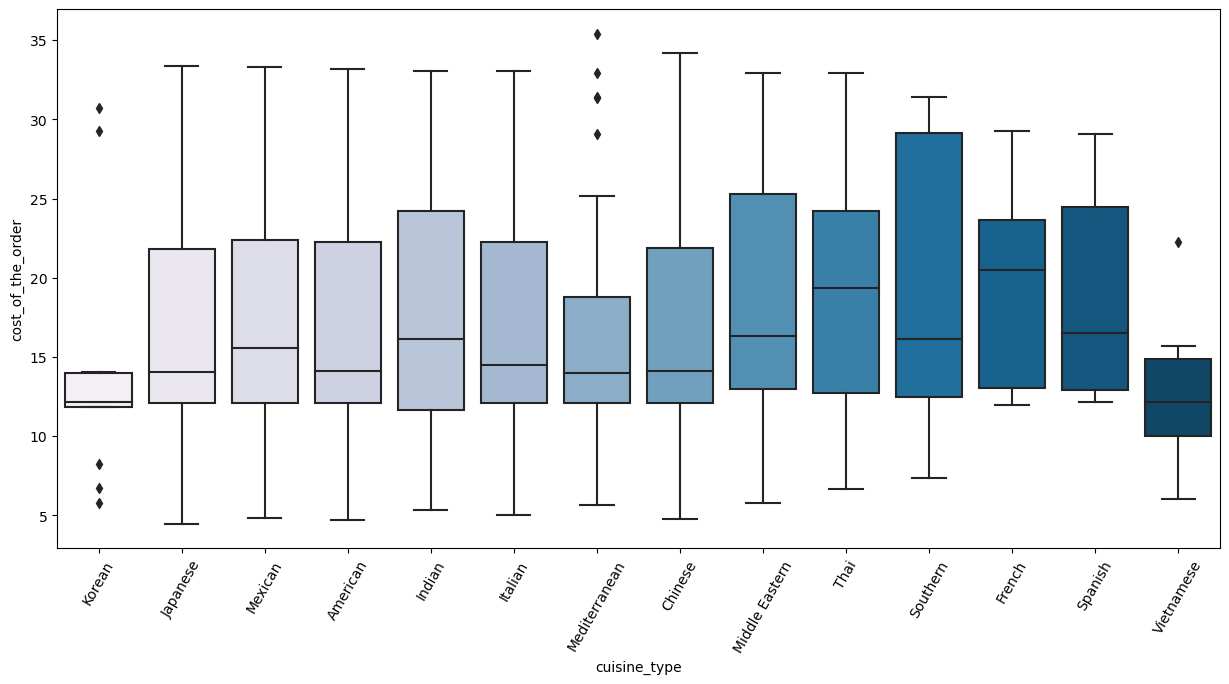

In [30]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

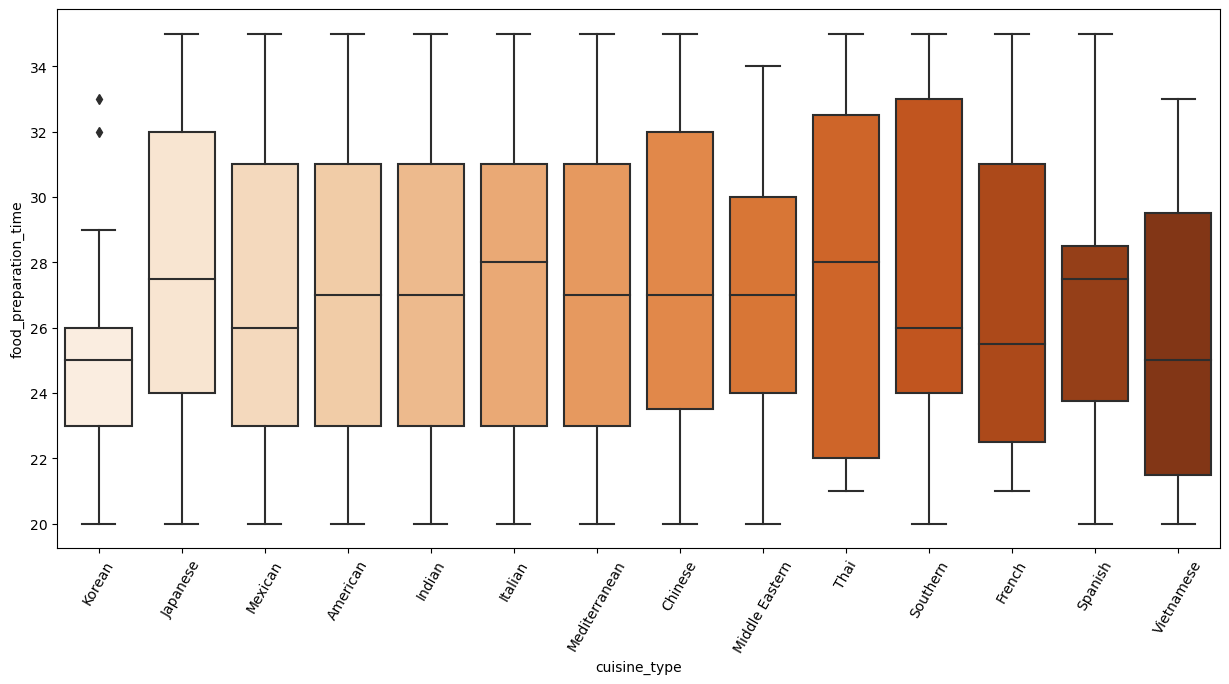

In [31]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'Oranges')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

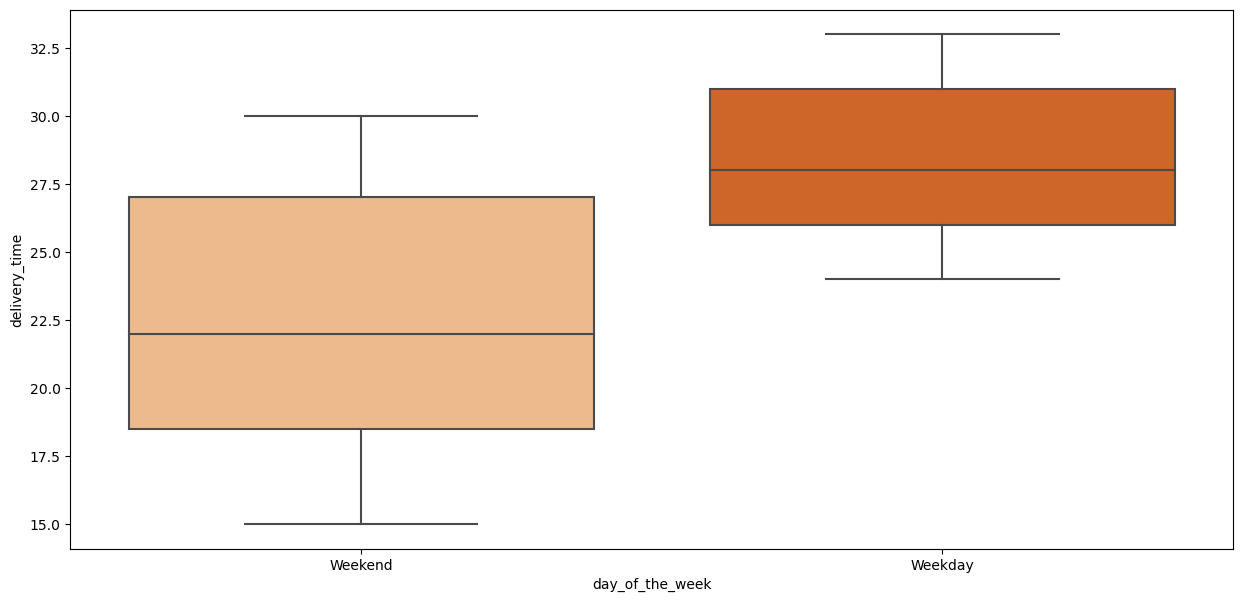

In [32]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'Oranges')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [33]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

My observations from the revenues generated are presented as follows:
    - Restuarants with Top Revenues:
        - Shake Shack Restaurant generted the highest revenue amounted to $3,579.53. This may imply that Shake Shack is the most 
        popular restaurant.

        - The Meatball Restaurant is the second highest with $2,145.21 total revenue, showing that it also generates significant 
        revenue. 
In summary, the top four Restaurants with revenues are:
   - Shake Shack                      3579.53
   - The Meatball Shop                2145.21
   - Blue Ribbon Sushi                1903.95
   - Blue Ribbon Fried Chicken        1662.29
    
While the Restaurants with moderate Revenues are:
    
   - Parm                             1112.76 
   - RedFarm Broadway                  965.13
   - RedFarm Hudson                    921.21
   - TAO                               834.50

ADDITIONALLY,
The Resturants with lower revenues are:
    -Han Dynasty                       755.29
    - Blue Ribbon Sushi Bar & Grill     666.62
    - Rubirosa                          660.45
    - Sushi of Gari 46                  640.87
    - Nobu Next Door                    623.67

Lastly,
    - The Restaurant with lowest Revenue is:
        Five Guys Burgers and Fries       506.47

In conclusion, those resturants with high revenues could means that they are big in size, resources and facilities. 
They can be referred as market leaders but Shake Shack Restaurant is main leader. 

Also, the restaurant with the least revenue 
could imply new entrants, especially Five Guys Burgers and Fries. They are not pupolar in the market, and they smaller resources,
 and facilities.
    

#### Rating vs Delivery time

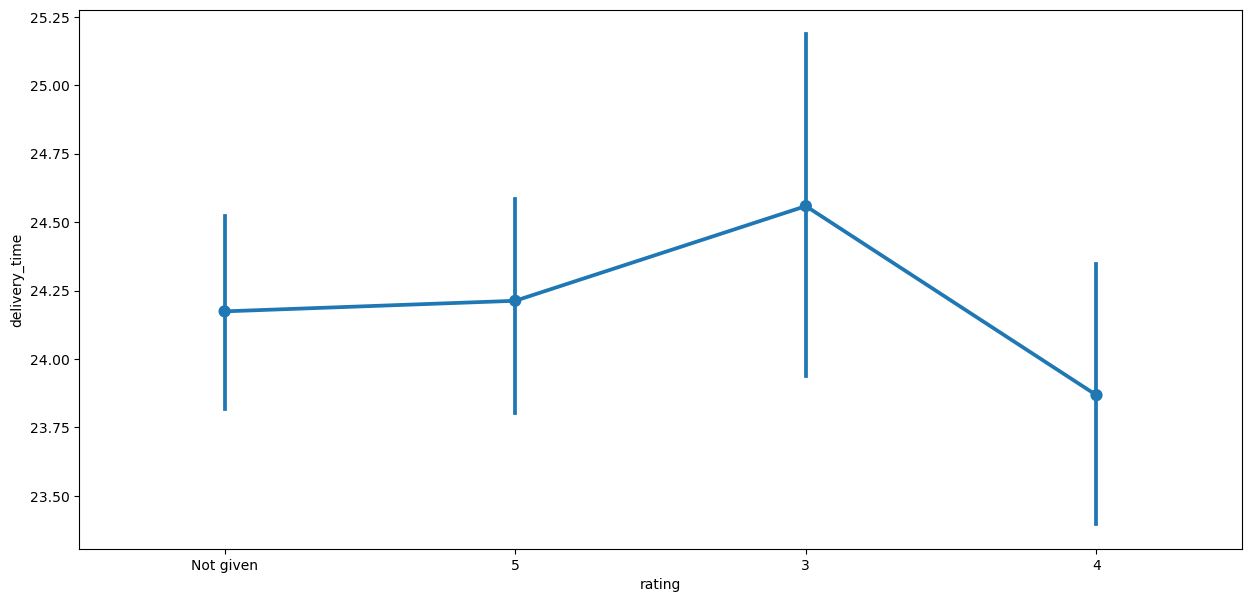

In [34]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

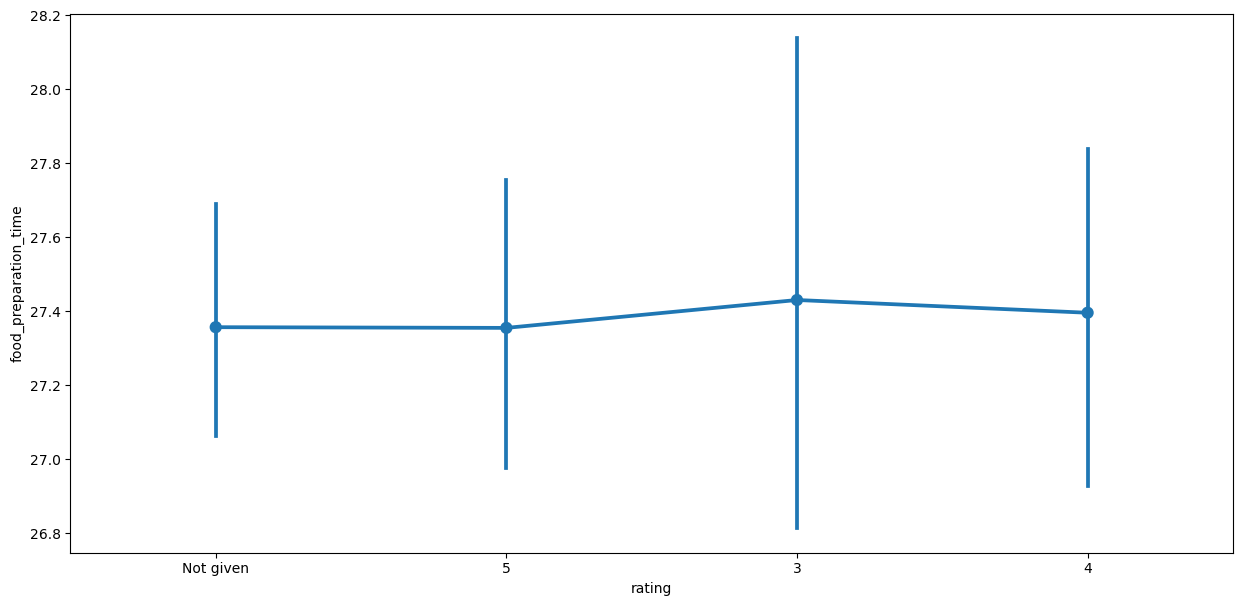

In [35]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

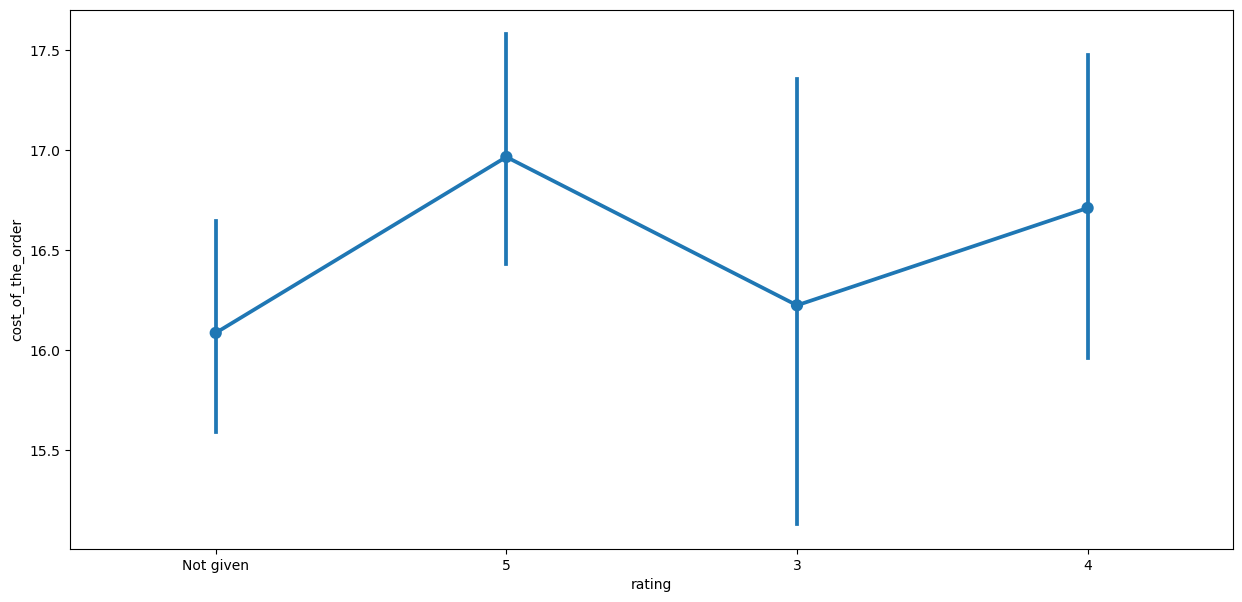

In [36]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

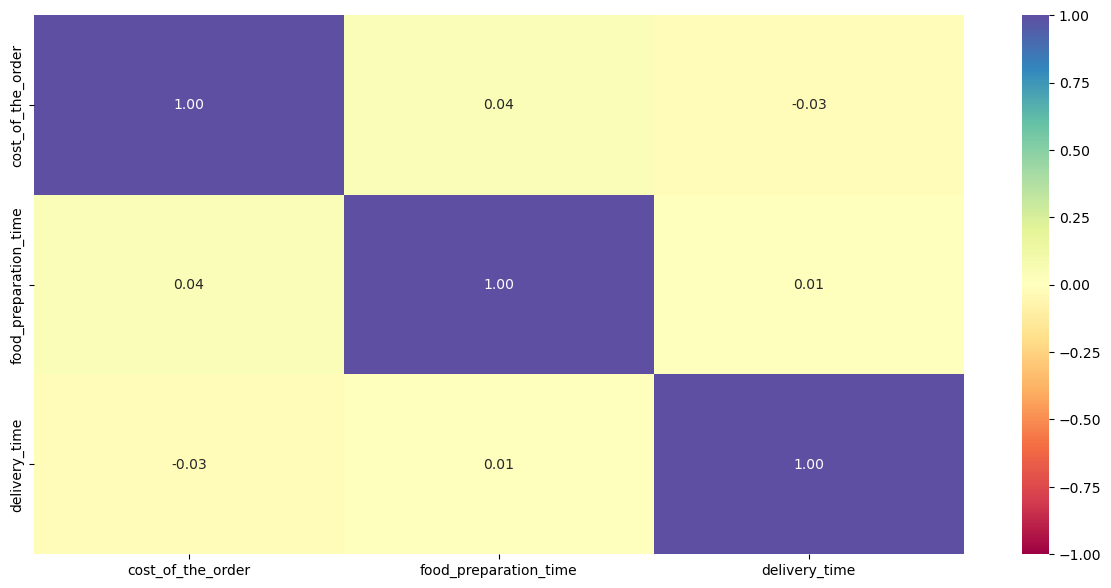

In [37]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [39]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']## Complete the code to get the restaurant names having rating count more than 50
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [41]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [42]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders with total delivery time more than 60 minutes
Total_orders = len(df)

Orders_Over_60_minutes = len(df[df['total_time'] > 60])

## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
Percentage_Over_60_minutes = (Orders_Over_60_minutes / Total_orders) * 100


In [43]:

print("percentage of orders with total delivery time more than 60 minutes:", round(Percentage_Over_60_minutes, 2), '%')

percentage of orders with total delivery time more than 60 minutes: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on Weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on Weekend is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

## Key Insights and Summary:

- Order Cost and Volume:
    - The number of total orders that cost above $20 is 555, which represents 29.24% of all orders.
    - The mean delivery time for the dataset is 24.16 minutes.
    - Top Performing Restaurants:

- The top 5 restaurants in terms of the number of orders received are:
    - Shake Shack: 219 orders
    - The Meatball Shop: 132 orders
    - Blue Ribbon Sushi: 119 orders
    - Blue Ribbon Fried Chicken: 96 orders
    - Parm: 68 orders
        
The revenue generated by these restaurants is significant, with Shake Shack leading at $3579.53.
Delivery Times:

The percentage of orders with a total delivery time of more than 60 minutes is 10.54%.
The mean delivery time on weekdays is around 28 minutes, while on weekends, it is around 22 minutes.

### Conclusions:
By focusing on enhancing partnerships with top-performing restaurants, optimizing delivery operations, integrating customer feedback, targeting higher-value orders, expanding the restaurant network, and engaging with customers through marketing strategies, FoodHub can significantly improve its customer experience and business performance. 

Regular monitoring and data-driven decision-making will ensure that the company remains responsive to market trends and customer needs.

### Recommendations:

1. Enhance Partnerships with Top Restaurants:
    - They should negotiate exclusive deals with top-performing restaurants like Shake Shack, The Meatball Shop, and Blue Ribbon Sushi to attract more customers.
    - Recognise these popular restaurants on the app's homepage or through targeted marketing campaigns to boost order volumes.


2. Optimize Delivery Operations:
    - Use data analytics to optimize delivery routes for quicker pick-up and drop-off times, enhancing customer satisfaction.
    - Focus on reducing the 10.54% of orders with delivery times over 60 minutes by identifying and mitigating common delay points.
    
    
3. Customer Feedback Integration:
    - Regularly analyzing customer ratings and reviews to identify areas for improvement in service and food quality.
    - Developing a responsive customer support system to quickly address and resolve any issues reported by customers.

4. Target Higher-Value Orders:
    - Creating incentives for orders above $20, such as free delivery or discounts on future orders, to increase the percentage of higher-value transactions.
    - Consider offering premium services for high-value orders, such as faster delivery or special packaging.

5. Expand Restaurant Network:
    - Identify and onboard new restaurants that align with customer preferences and have the potential to become popular choices.
    - Ensure a diverse range of cuisine options to cater to varying customer tastes and preferences.
Marketing and Customer Engagement:
    - Introduce loyalty programs to reward repeat customers and encourage them to order more frequently.
    - Utilize data to provide personalized restaurant recommendations based on customer order history and preferences.

6. Performance Monitoring:
    - Regularly monitor key performance metrics such as order volume, average delivery time, and customer ratings to track the effectiveness of implemented strategies.
    - Foster a culture of continuous improvement by regularly updating processes and offerings based on data insights.

---